In [1]:
import numpy as np
import pandas as pd


In [2]:
scores=np.random.randint(50,101,(5,3))
names=('关羽', '张飞', '赵云', '马超', '黄忠')
courses=('语文', '数学', '英语')
df=pd.DataFrame(data=scores,columns=courses,index=names)
df

,语文,数学,英语
关羽,50,94,56
张飞,53,99,66
赵云,57,70,65
马超,89,91,62
黄忠,60,52,90


In [3]:
df.describe()

,语文,数学,英语
count,5.000000,5.000000,5.00000
mean,61.800000,81.200000,67.80000
std,15.674821,19.715476,13.00769
min,50.000000,52.000000,56.00000
25%,53.000000,70.000000,62.00000
50%,57.000000,91.000000,65.00000
75%,60.000000,94.000000,66.00000
max,89.000000,99.000000,90.00000


In [4]:
df.mean(axis=1)

关羽    66.666667
张飞    72.666667
赵云    64.000000
马超    80.666667
黄忠    67.333333
dtype: float64

In [5]:
df.var()

语文    245.7
数学    388.7
英语    169.2
dtype: float64

In [6]:
df.sort_values(by='语文',ascending=False)

,语文,数学,英语
马超,89,91,62
黄忠,60,52,90
赵云,57,70,65
张飞,53,99,66
关羽,50,94,56


In [7]:
df.nlargest(3,'数学')
df.nsmallest(3,'数学')

,语文,数学,英语
黄忠,60,52,90
赵云,57,70,65
马超,89,91,62


In [8]:
df=pd.read_excel('./2020年销售数据.xlsx')
df

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61
...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59


In [9]:
df['销售总额']=df['销售数量']*df['售价']
df.nlargest(5,'销售总额')

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售总额
251,2020-02-03,北京,拼多多,G70509,花花姑娘,1499,89,133411
1520,2020-09-19,广东,拼多多,G68188,花花姑娘,1299,93,120807
1095,2020-06-17,上海,拼多多,577714-010,皮皮虾,1199,97,116303
149,2020-01-21,上海,拼多多,543367-077,皮皮虾,1199,96,115104
721,2020-04-11,江苏,天猫,G72186,花花姑娘,1299,88,114312


In [10]:
df.head()

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售总额
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189


In [11]:
df.groupby('销售区域').销售总额.sum()

销售区域
上海    11610489
北京    12477717
安徽      895463
广东     1617949
江苏     2304380
浙江      687862
福建    10178227
Name: 销售总额, dtype: int64

In [12]:
df.groupby(df['销售日期'].dt.month).销售总额.sum()

销售日期
1     5409855
2     4608455
3     4164972
4     3996770
5     3239005
6     2817936
7     3501304
8     2948189
9     2632960
10    2375385
11    2385283
12    1691973
Name: 销售总额, dtype: int64

In [13]:
df.groupby(['销售区域',df['销售日期'].dt.month]).销售总额.sum()

销售区域  销售日期
上海    1       1679125
      2       1689527
      3       1061193
      4       1082187
      5        841199
      6        785404
      7        863906
      8        734937
      9       1107693
      10       412108
      11       825169
      12       528041
北京    1       1878234
      2       1807787
      3       1360666
      4       1205989
      5        807300
      6       1216432
      7       1219083
      8        645727
      9        390077
      10       671608
      11       678668
      12       596146
安徽    4        341308
      5        554155
广东    3        388180
      8        469390
      9        365191
      11       395188
江苏    4        537079
      7        841032
      10       710962
      12       215307
浙江    3        248354
      8        439508
福建    1       1852496
      2       1111141
      3       1106579
      4        830207
      5       1036351
      6        816100
      7        577283
      8        658627
      9        769999

In [14]:
df.groupby('销售区域').销售总额.agg(['sum','max','min'])

,sum,max,min
销售区域,,,
上海,11610489,116303,948
北京,12477717,133411,690
安徽,895463,68502,1683
广东,1617949,120807,990
江苏,2304380,114312,1089
浙江,687862,90909,3927
福建,10178227,87527,897


In [15]:
df.groupby('销售区域').销售总额.agg(销售总额='sum', 单笔最高='max', 单笔最低='min')

,销售总额,单笔最高,单笔最低
销售区域,,,
上海,11610489,116303,948
北京,12477717,133411,690
安徽,895463,68502,1683
广东,1617949,120807,990
江苏,2304380,114312,1089
浙江,687862,90909,3927
福建,10178227,87527,897


In [16]:
df.groupby('销售区域')[['销售总额', '销售数量']].agg({
    '销售总额': 'mean', '销售数量': ['max', 'min']
})

销售总额 销售数量    
              mean  max min
销售区域                       
上海    20622.538188  100  10
北京    20125.350000  100  10
安徽    26337.147059   98  16
广东    32358.980000   98  10
江苏    23756.494845  100  11
浙江    27514.480000   95  20
福建    18306.163669  100  10

In [17]:
pd.pivot_table(df,index=['销售区域','销售渠道'],values=['销售总额','销售数量'],aggfunc='sum')

销售总额   销售数量
销售区域 销售渠道                
上海   京东    2496713   6877
     天猫    3600491  10109
     实体    1545411   4099
     抖音    1415208   3942
     拼多多   2552666   6934
北京   京东    2312365   6615
     天猫    4150172  11218
     实体    1718535   4545
     抖音    1681974   3886
     拼多多   2614671   6929
安徽   京东     119735    265
     天猫     415569    831
     实体     124288    242
     抖音      90157    143
     拼多多    145714    316
广东   京东     232107    523
     天猫     771932   1478
     实体     116205    245
     抖音     147477    203
     拼多多    350228    522
江苏   京东     389886    944
     天猫     941431   2229
     实体     316228    742
     抖音     286511    679
     拼多多    370324    806
浙江   京东     157283    287
     天猫     360950    650
     实体      28965     85
     抖音      17400     60
     拼多多    123264    336
福建   京东    1986379   6011
     天猫    3458358  10512
     实体    1298787   3953
     抖音    1144178   3632
     拼多多   2290525   6555

In [18]:
pd.pivot_table(df,index=['销售区域',df['销售日期'].dt.month],values='销售总额',aggfunc=sum)

销售总额
销售区域 销售日期         
上海   1     1679125
     2     1689527
     3     1061193
     4     1082187
     5      841199
     6      785404
     7      863906
     8      734937
     9     1107693
     10     412108
     11     825169
     12     528041
北京   1     1878234
     2     1807787
     3     1360666
     4     1205989
     5      807300
     6     1216432
     7     1219083
     8      645727
     9      390077
     10     671608
     11     678668
     12     596146
安徽   4      341308
     5      554155
广东   3      388180
     8      469390
     9      365191
     11     395188
江苏   4      537079
     7      841032
     10     710962
     12     215307
浙江   3      248354
     8      439508
福建   1     1852496
     2     1111141
     3     1106579
     4      830207
     5     1036351
     6      816100
     7      577283
     8      658627
     9      769999
     10     580707
     11     486258
     12     352479

In [19]:
pd.pivot_table(df,index='销售区域',columns=df['销售日期'].dt.month,values='销售总额',aggfunc=sum,fill_value=0)

销售日期,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


In [20]:
df['月份']=df['销售日期'].dt.month
pd.pivot_table(df,index='销售区域',columns='月份',values='销售总额',aggfunc=sum,fill_value=0,margins=True,margins_name='总计')

月份,1,2,3,4,5,6,7,8,9,10,11,12,总计
销售区域,,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041,11610489
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146,12477717
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0,895463
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0,1617949
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307,2304380
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0,687862
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479,10178227
总计,5409855,4608455,4164972,3996770,3239005,2817936,3501304,2948189,2632960,2375385,2385283,1691973,39772087


In [21]:
sales_area,sales_month,sales_amount=df['销售区域'],df['月份'],df['销售总额']


In [22]:
pd.crosstab(index=sales_area,columns=sales_month,values=sales_amount,aggfunc=sum).fillna(0).applymap(int)

月份,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,841032,0,0,710962,0,215307
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


In [23]:
import matplotlib.pyplot as plt

Duplicate key in file WindowsPath('d:/environments/Anaconda/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Microsoft YaHei, sans-serif')
Duplicate key in file WindowsPath('d:/environments/Anaconda/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.serif:      Microsoft YaHei, DejaVu Serif, Bitstream Vera Serif, Computer Modern Roman, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif')


In [24]:
%config InlineBackend.figure_format = 'svg'

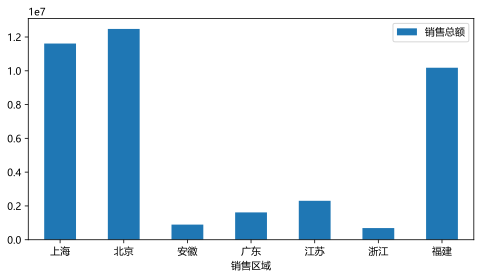

In [25]:
temp=pd.pivot_table(df,index='销售区域',values='销售总额',aggfunc=sum)
temp.plot(figsize=(8,4),kind='bar')
plt.xticks(rotation=0)
plt.show()

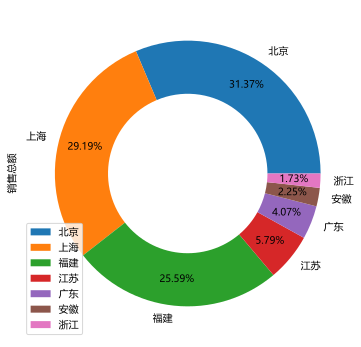

In [44]:
temp.sort_values(by='销售总额',ascending=False).plot(figsize=(6,6),kind='pie',y='销售总额',autopct='%.2f%%',pctdistance=0.8,wedgeprops=dict(linewidth=1,width=0.4))
plt.legend(loc='best')
plt.show()